In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 加载数据

In [2]:
csv_data = pd.read_csv("./Dataset/mlm.csv")
X = csv_data['x']
Y = csv_data['y']
Z = csv_data['z']

## 绘图

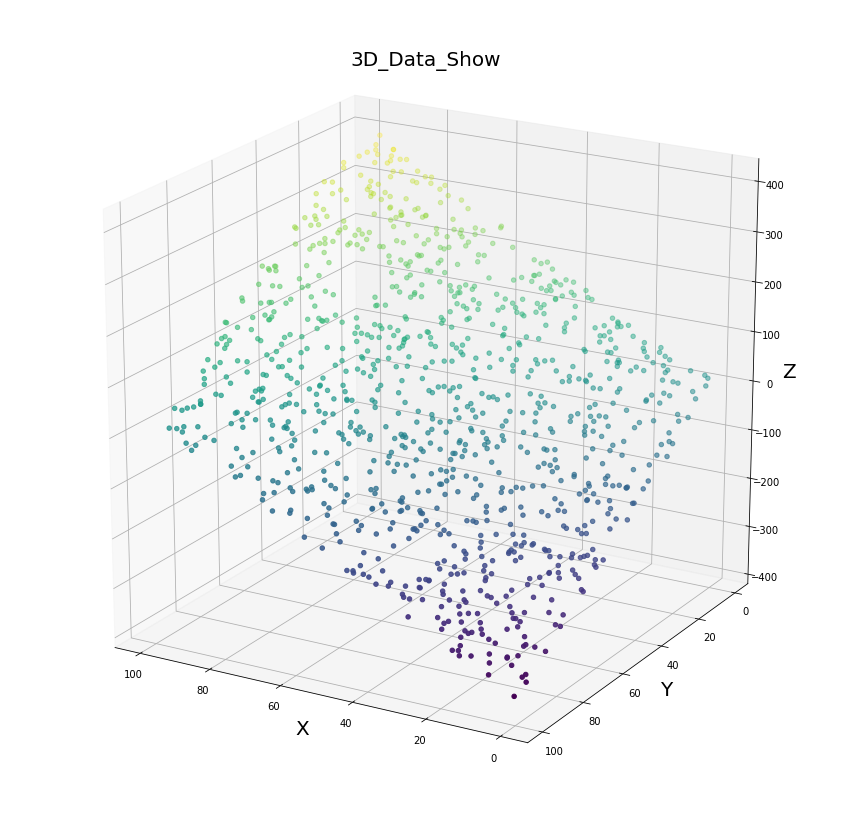

In [3]:
point_color = (Z - min(Z)) / (max(Z) - min(Z)) * 255
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)
ax = plt.subplot(projection = '3d')
ax.set_title('3D_Data_Show', fontsize=20)
ax.scatter(X, Y, Z, c = point_color)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.elev = 20
ax.azim = 120
plt.show()

## 划分训练集测试集

In [4]:
data_input = np.array(csv_data[['x','y']].values.tolist())
data_output = np.array(Z.tolist())
x_train, x_test, z_train, z_test = train_test_split(data_input, data_output, test_size = 0.25, random_state = 0)

## 正规方程方法

In [5]:
lr = LinearRegression()
lr.fit(x_train, z_train)
print(lr.coef_)

z_lr_predict = lr.predict(x_test)
print("zheng'gui均方误差",mean_squared_error(z_test,z_lr_predict))

[ 4.02091371 -3.77092297]
zheng'gui均方误差 3.3903432369402053


## 梯度下降方法

In [6]:
sg = SGDRegressor()
sg.fit(x_train, z_train)
print(sg.coef_)

z_sg_predict = sg.predict(x_test)
print("梯度下降均方误差",mean_squared_error(z_test,z_sg_predict))

[-1.55083885e+09 -2.57322999e+09]
梯度下降均方误差 5.261281858833661e+22
